# MapReduce is a processing technique and a program model for distributed computing.

The MapReduce algorithm contains two important tasks, namely Map and Reduce. Map takes a set of data and converts it into another set of data, where individual elements are broken down into tuples (key/value pairs). Secondly, reduce task, which takes the output from a map as an input and combines those data tuples into a smaller set of tuples. As the sequence of the name MapReduce implies, the reduce task is always performed after the map job.

The major advantage of MapReduce is that it is easy to scale data processing over multiple computing nodes. Under the MapReduce model, the data processing primitives are called mappers and reducers.

Decomposing a data processing application into mappers and reducers is sometimes nontrivial. But, once we write an application in the MapReduce form, scaling the application to run over hundreds, thousands, or even tens of thousands of machines in a cluster is merely a configuration change.

MapReduce Algorithm uses the following three main steps:

    Map Function
    Shuffle Function
    Reduce Function


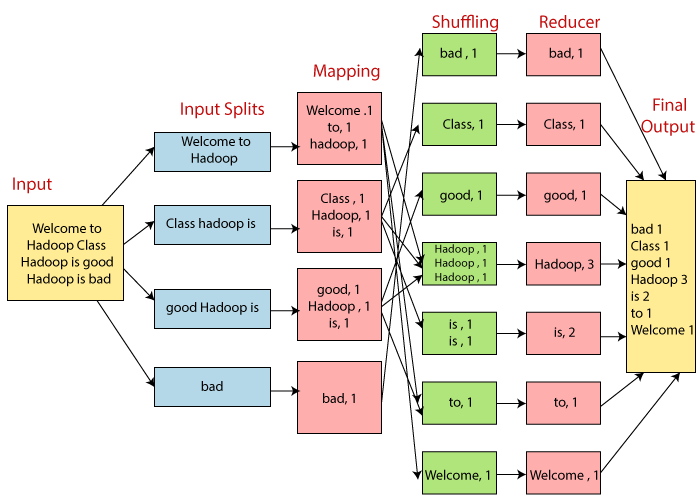

In [1]:
from IPython.display import Image
Image(filename='./screenshots/MapReduce.png')



In [2]:
from functools import reduce
from itertools import groupby

# Map, Reduce, Groupby Functions

In [4]:
'''
Getting help on the map structure
'''

help(map)

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [5]:
'''
Sample function
'''


def my_sum(a):
    return a + a + a

In [8]:
'''
Calling sum function
'''
my_sum(7)

21

In [9]:
'''
Creating a list
'''
mylist = [1,2,3,4]
mylist

[1, 2, 3, 4]

In [13]:
'''
Making a sort of mapping between the output of sum, mylist and a new list
'''

list(map(my_sum, mylist))

[3, 6, 9, 12]

In [15]:
'''
Getting help on groupby
'''
help(groupby)

Help on class groupby in module itertools:

class groupby(builtins.object)
 |  groupby(iterable, key=None)
 |  
 |  make an iterator that returns consecutive keys and groups from the iterable
 |  
 |  iterable
 |    Elements to divide into groups according to the key function.
 |  key
 |    A function for computing the group category for each element.
 |    If the key function is not specified or is None, the element itself
 |    is used for grouping.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Cre

In [16]:
'''
Another example of a list of tuples
'''
listoff = [('a', 1), ('a', 2), ('b', 5)]
list(groupby(listoff, key=lambda x: x[0]))

[('a', <itertools._grouper at 0x23dc77b59d0>),
 ('b', <itertools._grouper at 0x23dc77b57c0>)]

In [17]:
'''
What is Reduce
'''
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, sequence[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence,
    from left to right, so as to reduce the sequence to a single value.
    For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the sequence in the calculation, and serves as a default when the
    sequence is empty.



In [18]:
'''
Let's try that out

# How it works for reduce
# 1. [1, 2, 3]
# 2. [3, 3]
# 3. [6]
# 3. 6

it is just a fancy loop via lamda to reduce the input data
'''

reduce(lambda x, y: x + y, [1, 2, 3])

6

# Mapping

In [77]:
'''
Let's take a list of strings 
'''

words = ['Deer', 'Bear', 'River', 'Car','Car', 'River', 'Deer', 'Car', 'Bear']

In [78]:
'''
Key pairing
'''

mapping = list(map(lambda x: (x, 1), words))
print(mapping)

[('Deer', 1), ('Bear', 1), ('River', 1), ('Car', 1), ('Car', 1), ('River', 1), ('Deer', 1), ('Car', 1), ('Bear', 1)]


# Shuffling

In [79]:
'''
now shulling the above mapped key-pairs
via the use of merge sort: Even alphanumericaly
'''

sorted_mapping = sorted(mapping)
print(sorted_mapping)

[('Bear', 1), ('Bear', 1), ('Car', 1), ('Car', 1), ('Car', 1), ('Deer', 1), ('Deer', 1), ('River', 1), ('River', 1)]


# Reducing

In [80]:
'''
Now done with mapping till shuffling
Let's reduce this headache, 
it goes by the use of groupby 
#### needed librairies####
from functools import reduce
from itertools import groupby
#############################

Then use of a for loop to append the groups per keys
'''
# There we go

# ------ breakdown of 'Reducing' Phase ---------
grouper = groupby(sorted_mapping, lambda p: p[0])


In [81]:
results = []

# loop through each group
for group in grouper:
    # key that is in the group
    key = group[0] 
    print(key)
    
    # list of groups for this key
    key_value_pairs = list(group[1]) 
    print('Key-pair is: ', key_value_pairs)
    
    # only values for current key
    values_for_this_key = list(map(lambda p: p[1], key_value_pairs)) 
    values_for_this_key = [i[1] for i in key_value_pairs]
    print('Key vlaue', values_for_this_key)
    
    # final part of map 'reduce', for this key
    count_of_current_key = reduce(lambda x, y: x + y, values_for_this_key) 
    print('Count of keys:', count_of_current_key)
    
    # put it to results
    results.append((key, count_of_current_key))

    # runs only one if break is uncommented
    # break

Bear
Key-pair is:  [('Bear', 1), ('Bear', 1)]
Key vlaue [1, 1]
Count of keys: 2
Car
Key-pair is:  [('Car', 1), ('Car', 1), ('Car', 1)]
Key vlaue [1, 1, 1]
Count of keys: 3
Deer
Key-pair is:  [('Deer', 1), ('Deer', 1)]
Key vlaue [1, 1]
Count of keys: 2
River
Key-pair is:  [('River', 1), ('River', 1)]
Key vlaue [1, 1]
Count of keys: 2


In [82]:
'''
Since the list results contains all what it has been reduced, 
Let's plot that out
'''
results

[('Bear', 2), ('Car', 3), ('Deer', 2), ('River', 2)]

In [83]:
'''
Final phase of Reduce is to come up with the connect the ends all in one step
These resumes the above all in one step (Only after shuffling resulting in sorted_mapping)
'''

grouper = groupby(sorted_mapping, lambda p: p[0])

final = map(
    lambda l: (l[0], reduce(lambda x, y: x + y, map(lambda p: p[1], l[1]))), 
    grouper # <- [('Bear', 1), ('Bear', 1)] ---->     l[0] = 'Bear'     and      l[1] = 1
)
print(list(final))



[('Bear', 2), ('Car', 3), ('Deer', 2), ('River', 2)]


In [84]:
results

[('Bear', 2), ('Car', 3), ('Deer', 2), ('River', 2)]

Same exact thing 

# Single Machine and Multiple Machines

In [53]:
%%writefile single_machine.py
# single_machine.py

import re
import json
import itertools

# remove any non-words and split lines into separate words
# finally, convert all words to lowercase
def splitter(line):
    line = re.sub(r'^\W+|\W+$', '', line)
    return map(str.lower, re.split(r'\W+', line))

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(itertools.islice(iterable, n))

sums = {}

try:
    in_file = open('Readme.md', 'r')

    for line in in_file:
        for word in splitter(line):
            word = word.lower()
            sums[word] = sums.get(word, 0) + 1
                 
    in_file.close()

except IOError:
    print("error performing file operation")
else:
    M = max(sums.keys(), key=lambda k: sums[k])

print("max: {} = {}".format(M, sums[M]))

print(json.dumps(take(10, sums.items()), sort_keys=True))

Overwriting single_machine.py


In [54]:
%%time

! python single_machine.py

max:  = 18
[["mapreduce", 3], ["with", 4], ["python", 1], ["", 18], ["find", 6], ["a", 6], ["few", 1], ["answers", 1], ["from", 4], ["large", 1]]
Wall time: 128 ms


In [55]:
%%writefile mapping.py
# mapping.py
import re

# remove any non-words and split lines into separate words
# finally, convert all words to lowercase
def splitter(line):
    line = re.sub(r'^\W+|\W+$', '', line)
    return map(str.lower, re.split(r'\W+', line))
    
input_file = 'Readme.md'
map_file = 'Readme.md.map'

# Implement our mapping function

sums = {}
try:
    in_file = open(input_file, 'r')
    out_file = open(map_file, 'w')

    for line in in_file:
        for word in splitter(line):
            out_file.write(word.lower() + "\t1\n") # Separate key and value with 'tab'
            
    in_file.close()
    out_file.close()

except IOError:
    print("error performing file operation")

Writing mapping.py


In [56]:
%%time

! python mapping.py

Wall time: 143 ms


In [57]:
%%writefile shuffling.py
# shuffling.py

map_file = 'Readme.md.map'
sorted_map_file = 'Readme.md.map.sorted'

def build_index(filename):
    index = []
    f = open(filename)
    while True:
        offset = f.tell()
        line = f.readline()
        if not line:
            break
        length = len(line)
        col = line.split('\t')[0].strip()
        index.append((col, offset, length))
    f.close()
    index.sort()
    return index

try:
    index = build_index(map_file)
    in_file = open(map_file, 'r')
    out_file = open(sorted_map_file, 'w')
    for col, offset, length in index:
        in_file.seek(offset)
        out_file.write(in_file.read(length))
    in_file.close()
    out_file.close()
except IOError:
    print("error performing file operation")

Writing shuffling.py


In [58]:
%%time

! python shuffling.py

Wall time: 147 ms


In [59]:
%%writefile reducing.py
# reducing.py

import json
import itertools

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(itertools.islice(iterable, n))

sums = {}
sorted_map_file = 'Readme.md.map.sorted'
reduced_map_file = 'Readme.md.map.reduced'

previous = None
M = [None, 0]

def checkmax(key, sum):
    global m, M
    if M[1] < sum:
        M[1] = sum
        M[0] = key

try:
    in_file = open(sorted_map_file, 'r')
    for line in in_file:
        key, value = line.split('\t')
        
        if key != previous:
            if previous is not None:
                checkmax(previous, sum)
            previous = key
            sum = 0
            
        sum += int(value)
        
    checkmax(previous, sum)
    in_file.close()
except IOError:
    print("error performing file operation")
    
print("max: %s = %d" % (M[0], M[1]))
with open(reduced_map_file, 'w+') as stream:
    json.dump(take(10, sums.items()), stream, sort_keys=True)

Writing reducing.py


In [60]:
%%time

! python reducing.py

max:  = 18
Wall time: 125 ms
